In [1]:
# 만약 fonts 폴더에 나눔고딕 폰트가 없을 경우, ./Theme/exctract_sentiment.py 에서 해당 코드를 수정하거나, 나눔고딕 폰트를 다운받으세요

#연관 단어 시각화
#document-term matrix (count 기반)
import pandas as pd
import time, os

#시각화 packages
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="C:\\Windows\\Fonts\\malgun.ttf").get_name() # 시각화시 한글 설정
rc('font', family=font_name)

In [14]:
import pandas as pd

df1 = pd.read_csv("./preprocessing/ddanzzi.csv")
df2 = pd.read_csv("./preprocessing/clien.csv")
df3 = pd.read_csv("./preprocessing/bobe.csv")

df1

,domain,keyword,title,writer,url,time,view_cnt,like_cnt,content,com_cnt,com_text,user_text
0,딴지,이낙연,"설훈 ""이낙연 사면론, 국민통합에 집중…당원들, 쿨다운해야""",ddanzinews,https://www.ddanzi.com/index.php?_filter=searc...,2021-01-04,3100,36.0,https://news.naver.com/main/read.nhn?mode=LSD&...,42,"[""'soulking' 2021-01-04 20:47 : 이낙연에 줄선 놈들 같이 ...",https://news.naver.com/main/read.nhn?mode=LSD&...
1,딴지,이낙연,이낙연은...문재인 대통령을 너무 만만하게 보네요....,출근하는남자,https://www.ddanzi.com/index.php?_filter=searc...,2021-01-04,5973,50.0,"청와대 협의도 없이 ...지맘대로 ,,저러는거 같은데.... 에효 ......",43,"['마이더스손 2021-01-04 20:45 : 도랐네', '출근하는남자본문 글쓴이...","청와대 협의도 없이 ...지맘대로 ,,저러는거 같은데.... 에효 ......"
2,딴지,이낙연,이낙연 대표 대학생 면담은 받아라,다저스월시우승,https://www.ddanzi.com/index.php?_filter=searc...,2021-01-04,240,2.0,마지막 지지율 올릴 수 있는 방법이라고 병신같은 놈아... 이해가 안되네...,0,[],마지막 지지율 올릴 수 있는 방법이라고 병신같은 놈아... 이해가 안되네...
3,딴지,이낙연,이낙연 대표 면담 요청한 학생들에게 시민들이 식사를,막내야,https://www.ddanzi.com/index.php?_filter=searc...,2021-01-04,9099,207.0,7시간 넘게 이낙연 대표를 면담하고자 민주당사 앞에서 농성중인 학생들이 그나마 식사...,54,['하얀잠자리 2021-01-04 20:41 : 어우나견이 때문에 화병 생기겠어요학...,7시간 넘게 이낙연 대표를 면담하고자 민주당사 앞에서 농성중인 학생들이 그나마 식사...
4,딴지,이낙연,이낙연 '대통령 사면 제한법' 대표 발의,우리는언제,https://www.ddanzi.com/index.php?_filter=searc...,2021-01-04,1550,17.0,강금원 회장 참 좋은 사람이었습니다...그 지역에서는 다 아는 사실....,10,"['K_______ 2021-01-04 20:42 : 개시발놈', '우리는언제본문 ...",강금원 회장 참 좋은 사람이었습니다...그 지역에서는 다 아는 사실....
...,...,...,...,...,...,...,...,...,...,...,...,...
3881,딴지,이재명,이재명이 그랬으면 미처 날뛰었겠죠,이단,https://www.ddanzi.com/index.php?_filter=searc...,2021-01-01,357,NaN,다행히 엄중이라 그냥 못본척 사실이 아닌척 엄중무새들 최소한도로 공평은 해야지 힘도...,6,['[N🔴]좋은사람/하루아빠🐱🐶 2021-01-01 09:28 : 메모는 사이언스'...,다행히 엄중이라 그냥 못본척 사실이 아닌척 엄중무새들 최소한도로 공평은 해야지 힘도...
3882,딴지,이재명,이재명 스타일은 많이 무섭습니다만 요즘은 생각이 조금 바뀌네요,캡틴아프리카청춘이다,https://www.ddanzi.com/index.php?_filter=searc...,2021-01-01,5920,63.0,강단있게 결정한 바를 밀어붙이는게 물론 긍정적인 부분이 훨씬 많겠지만 억울하게 선의...,34,['더민주2020 2021-01-01 08:59 : [ 본인 요청에 의해 삭제된 댓...,강단있게 결정한 바를 밀어붙이는게 물론 긍정적인 부분이 훨씬 많겠지만 억울하게 선의...
3883,딴지,이재명,신년사 - 이재명 경기도지사,⚡️전기팔이소년⚡️,https://www.ddanzi.com/index.php?_filter=searc...,2021-01-01,435,16.0,"존경하는 1,380만 경기도민 여러분,신축년 새해가 밝았습니다. 도민 여러분의 가정...",3,['HallelujahEssaim 2021-01-01 08:51 : 다행히 사면건의...,"존경하는 1,380만 경기도민 여러분,신축년 새해가 밝았습니다. 도민 여러분의 가정..."
3884,딴지,이재명,이재명 지지자입니다만....,🎗초우,https://www.ddanzi.com/index.php?_filter=searc...,2021-01-01,685,9.0,할 말은 많지만 하지 않겠습니다 펙트체크 될때까지 지켜봅시다,11,['HallelujahEssaim 2021-01-01 08:35 : 사면건의 발언 ...,할 말은 많지만 하지 않겠습니다 펙트체크 될때까지 지켜봅시다


In [15]:
df2

,Unnamed: 0,domain,keyword,title,writer,url,time,view_cnt,like_cnt,user_text,com_cnt,com_text
0,0,클리앙,이낙연,오늘 아침 이낙연 의원 CBS 김현정의 뉴스쇼에서 인터뷰한 내용,하이타이거,https://www.clien.net/service/board/park/16034...,2021-04-06 12:00:42,2719,6,이낙연의원이 김현정의 뉴스쇼에 나와서 한 발언중 일부를 가져왔습니다.이길수도 있을것...,5,"['날라리어부 : 김현정 이인간은 계속 미끼를 던지네요. 덥썩 물기라도 하면 ""으..."
1,1,클리앙,이낙연,이낙연의원 트윗으로 유추해보는 선거판세.jpg,하이타이거,https://www.clien.net/service/board/park/16033...,2021-04-06 11:38:23,6893,28,어떤분이 그러시더군요.선거판세를 예상하려면월요일이나 화요일에 '수고했습니다! 감사합...,15,['store : 2016년 총선도투표 전날까지 새누리당이 180석 먹는게 그냥 기...
2,2,클리앙,이낙연,"똥아) 서민 '이낙연, 친문(클량)이 외면해서 대권가도 이탈했다'...?",blowtorch,https://www.clien.net/service/board/park/16033...,2021-04-06 09:55:30,1741,7,출처: 주간동아 최신호요약)1. 찌라시를 읽어보니 이낙연의 새해 사면론 카드는 문통...,9,"['해피하게 : 진중권같은 서민이네..', '감마고 : 저 분은 의학인으로서 별 재..."
3,3,클리앙,이낙연,다른건 모르겠고 이낙연씨가 아무리 옳은 말 해도 이쁘게 보이진 않네요,요해,https://www.clien.net/service/board/park/16029...,2021-04-04 20:26:32,1472,6,외계인이 쳐들어오면 소련 미국 북한 남한 다 아군이라지만...이낙연씨는 외계인들 첩...,4,"['생귄 : 민주당의 망령이죠. 다시는 안봤으면 좋겠어요.', '솥단지 : 대통령도..."
4,4,클리앙,이낙연,"이낙연 ''10년전 돌아간다는 오세훈, 초등생 밥한끼 주기 싫다고 하던 그 시절 사절''",판사부정,https://www.clien.net/service/board/park/16029...,2021-04-04 20:10:14,3292,4,"이낙연 ""10년전으로 돌아간다는 오세훈, 초등생 밥한끼 주기 싫다고 하던 그 시절 ...",3,"['-익명- : 박영선이 대세긴한가보네요. 박쥐가 붙는 것 보면...', '독음운 ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
2885,2885,클리앙,이재명,이재명 민주당 대선후보만들기 본부 본부장 이낙연인가요,sian,https://www.clien.net/service/board/park/15752...,2021-01-01 09:23:52,835,0,이낙연씨 참 꾸준하네요그렇게 이재명을 대통령 만들어주고싶은건지,2,"['지나가던이 : 정치적 자살이 취미신듯 ㅇ', '빛틀 : 애초 저는 그 분에 대한..."
2886,2886,클리앙,이재명,저는 이재명 지사 극도로 싫어하는 사람이지만,misde989,https://www.clien.net/service/board/park/15751...,2021-01-01 08:49:36,1397,1,이낙연 대표 워딩 보고왜 이재명 지사를 지지하는 사람들이 많은지 이해가 됐네요강하게...,6,"['misde989 : (추가) 이재명 지사 외에 다른 대안도 많다고봅니다', 's..."
2887,2887,클리앙,이재명,추미애 이재명 지지합니다,달짝지근,https://www.clien.net/service/board/park/15751...,2021-01-01 08:07:11,1166,4,맘속 1순위 이낙연이었는데 명명백백하고 납득 가능한 해명이 있다면 모를까 지지철회합...,2,"['해피하게 : 저도 갈아탑니다. 지난 당대표 경선에서 밀었던게 부끄럽네요.', '..."
2888,2888,클리앙,이재명,"이재명, 다주택자 공무원 승진 진짜로 안 시킴 ㄷㄷ",대머리찰스,https://www.clien.net/service/board/park/15751...,2021-01-01 07:45:46,51836,99+,https://n.news.naver.com/article/003/001027134...,125,"['Castle : 하나하나 말한걸 실천하는 중이군요', '고미- : 이재명 지지율..."


In [16]:
df3

,domain,keyword,title,writer,url,time,view_cnt,like_cnt,user_text,com_cnt,com_text
0,보배드림,이낙연,넣어흥은 왜 아직도 이낙연을 지지하는겨[4],국민웨건볼보,https://www.bobaedream.co.kr/view?code=politic...,2021.04.03,115,0 & 0,우리 같이 지지할래?,4,"['당구장박사님짱 : 다마네기 이낙연 빨땐 언제고ㅋㅋ', 'colt69 : 이낙연은..."
1,보배드림,이낙연,이낙연 지지율 40%대에서 7%로[8],푸를청,https://www.bobaedream.co.kr/view?code=politic...,2021.04.03,196,0 & 0,한때 이낙연 지지율이 40%대에 이른적이 있었죠.....총리시절인가? ?그때였을 겁...,6,['국민웨건볼보 : 문재인 대통령 적통은 이낙연밖에 없습니다.진골도 아닌 성골입니다...
2,보배드림,이낙연,"나라다운 나라 만들었는지""...반성하며 靑과 거리 둔 이낙연",보배다,https://www.bobaedream.co.kr/view?code=politic...,2021.04.01,60,5 & 0,https://news.naver.com/main/read.nhn?mode=LSD&...,0,[]
3,보배드림,이낙연,'박원순 재평가' 원하는 與 일각…박영선·이낙연 '난감',pdbd,https://www.bobaedream.co.kr/view?code=politic...,2021.03.25,94,6 & 0,더듬어만진당 지도층과 그 지지자들 수준이란 가관이다. 등신들.'박원순 옹호' 임종석...,0,[]
4,보배드림,이낙연,"이낙연 “국민 여러분, 도와주십시오”…與, 냉담한 여론에 ‘읍[2]",문재앙탄핵연구소,https://www.bobaedream.co.kr/view?code=politic...,2021.03.25,136,4 & 0,"이 위원장은?25일 자신의?SNS를 통해 “앞으로 가자는 후보와, 뒤로 가자는 후보...",0,[]
...,...,...,...,...,...,...,...,...,...,...,...
241,보배드림,이재명,첫 30%대 지지율 기록… 2위 이재명 20.3%,Uhlalala,https://www.bobaedream.co.kr/view?code=politic...,2021.01.03,141,3 & 0,첫 30%대 지지율 기록… 2위 이재명 20.3%http://www.segye.co...,0,[]
242,보배드림,이재명,'안착' 이재명 '단단한' 윤석열 '바쁜' 이낙연..[2],장칼빈,https://www.bobaedream.co.kr/view?code=politic...,2021.01.03,161,0 & 0,https://news.v.daum.net/v/20210103055555933,2,"['도넛 : 작년 9월 설문...', '장칼빈 : https://news.v.dau..."
243,보배드림,이재명,이재명은 지금 그냥 가만히 있으면 알아서 지지율 오르겠네,최트로이,https://www.bobaedream.co.kr/view?code=politic...,2021.01.02,165,3 & 0,이낙연이 알아서 내려가겠다는데?당대표 되고 그냥 존재감이 사라진대다 한번씩 하는 말...,0,[]
244,보배드림,이재명,이낙연이 싫고 이재명이 싫어도 국짐당은 절대 안찍는다[4],최트로이,https://www.bobaedream.co.kr/view?code=politic...,2021.01.01,207,3 & 0,이런 마음이면 아무리 언론에서 흔들어대도 흔들리지만 바뀌진않을겁니다,4,"['l문재인l : 그람요~ 절대안되지라~니덜 좋아죽는 김정은 찍으심되지라~', '맹..."


In [21]:
# 상위 유저 파악

df_list = [df1, df2, df3]

df_new = pd.DataFrame()

for df in df_list :
    domain = df['domain'][0]
    name_list = df.writer.unique().tolist()
    df_old = pd.DataFrame()
    df_old['name'] = pd.Series(name_list)
    df_old['count'] = 1
    for i in range(len(df_old)) :
        df_old['count'][i] = len( [  x for x in df['writer'] if x == df_old['name'][i]  ])
    
    df_old.sort_values(by='count', inplace=True, ascending=False)
    df_old.reset_index(drop=True, inplace=True)
    
    df_new[domain+'name'] = df_old['name'][:10]
    df_new[domain+'count'] = df_old['count'][:10]

df_new

<ipython-input-21-de9250e86a78>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_old['count'][i] = len( [  x for x in df['writer'] if x == df_old['name'][i]  ])


,딴지name,딴지count,클리앙name,클리앙count,보배드림name,보배드림count
0,서둘,224,대머리찰스,63,보배다,14
1,realreality,83,kagajotaro,54,이웃과함께,13
2,지안군,71,Castle,39,치킨데이,11
3,로이거,59,Goodwillfind,34,뉘링부르2,10
4,기이임밥,53,sian,32,복수는처절하게,10
5,빵꾸뿡뿡,48,love114,32,달려누냐,9
6,홀리파워,47,blowtorch,27,Natureman,8
7,'soulking',47,코쿠,24,닉네임없음3,6
8,하긔개새끠무새,45,똥간귀신,23,흑백논리파괴자,6
9,MastarG,41,역사의시작,22,l문재인l,6


In [10]:
df = pd.read_csv("xfile_twitter.csv")
df

,domain,keyword,date,user_name,user_text
0,twitter,윤석열+x파일,2021-06-17,N24,이재명 같은걸 밀면서윤석열X파일같은 소리 하고 있다.트윗 인용하기허연바람™6월 17...
1,twitter,윤석열+x파일,2021-06-17,조국의시간,윤석열x파일이 어디
2,twitter,윤석열+x파일,2021-06-17,담비,추미애 전 법무부 장관 -대담집 통해 미완의 상태 검찰 개혁 언급할 것 -추-윤 갈...
3,twitter,윤석열+x파일,2021-06-17,시라소니,윤석열X 파일난 떳떳해 충격! 추미애 검찰당 후보 곧 허상 보게된다!https://...
4,twitter,윤석열+x파일,2021-06-17,커리커리,"송영길 ""윤석열X파일, 이명박 BBK처럼 野 경선서 밝혀질 것"" 이 병신봐라 이명..."
...,...,...,...,...,...
1034,twitter,윤석열+x파일,2021-06-23,min,어제 유재일씨가 먼저 알린 그분이구만.. 열린공감tv 열린민주당 관계단체이라던데....
1035,twitter,윤석열+x파일,2021-06-24,이청산,"[폴리뉴스] [유창선 칼럼]윤석열X파일, ‘생태탕 선거’의 연장전 되지 않기를[유창..."
1036,twitter,윤석열+x파일,2021-06-23,국민일보,"장성철 ""'윤석열X파일', 사찰 · 공작 아니다…문건 파기할 것""#SBS뉴스장성철 ..."
1037,twitter,윤석열+x파일,2021-06-24,"TIOT 박원순,가습기살균제 피해자들과 함께 합니다",틀렸습니다. 친여성향이 아니고 친이성향이겠죠. 친여와 친이는 매우 다릅니다. '윤...


In [9]:
df.keyword.value_counts()

이재명              7966
X파일              6317
이낙연              5252
정세균              4953
국민의힘+부동산+전수조사     699
Name: keyword, dtype: int64

In [ ]:
import plotly.graph_objects as go

fig =go.Figure(go.Sunburst(
    labels=["youtube", "딴지방송국", "[공식]새날", "이동형tv", "김용민tv", "김성회의 옳은소리", "알리미 황희두", "박시영tv"],
    parents=["", "youtube", "youtube", "youtube", "youtube", "youtube", "youtube", "youtube"],
    values=[14434,808,4693,1121,1191,531,5617,473],
    textinfo= 'label+value+percent entry',
    branchvalues= "total"))

fig= fig.update_layout(title_text="community",margin = dict(t=100, l=10, r=100, b=100))
fig.show()

In [20]:
import plotly.graph_objects as go

fig =go.Figure(go.Sunburst(
    labels=["youtube", "딴지방송국", "[공식]새날", "이동형tv", "김용민tv", "김성회의 옳은소리", "알리미 황희두", "박시영tv"],
    parents=["", "youtube", "youtube", "youtube", "youtube", "youtube", "youtube", "youtube"],
    values=[14434,808,4693,1121,1191,531,5617,473],
    textinfo= 'label+value+percent entry',
    branchvalues= "total"))

fig= fig.update_layout(title_text="community",margin = dict(t=100, l=10, r=100, b=100))
fig.show()



=====   도메인 : 딴지 분석 내용입니다.   =====


상위 1 위의 작성 관련 키워드입니다.
작성자명 : 서둘
유저 서둘의 이낙연 관련 키워드 활동 수는 53 입니다.
유저 서둘의 이재명 관련 키워드 활동 수는 171 입니다.
해당 유저는 이재명 키워드 관련 유저입니다.


상위 2 위의 작성 관련 키워드입니다.
작성자명 : realreality
유저 realreality의 이낙연 관련 키워드 활동 수는 80 입니다.
유저 realreality의 이재명 관련 키워드 활동 수는 3 입니다.
해당 유저는 이낙연 키워드 관련 유저입니다.


상위 3 위의 작성 관련 키워드입니다.
작성자명 : 지안군
유저 지안군의 이낙연 관련 키워드 활동 수는 17 입니다.
유저 지안군의 이재명 관련 키워드 활동 수는 54 입니다.
해당 유저는 이재명 키워드 관련 유저입니다.


상위 4 위의 작성 관련 키워드입니다.
작성자명 : 로이거
유저 로이거의 이낙연 관련 키워드 활동 수는 20 입니다.
유저 로이거의 이재명 관련 키워드 활동 수는 39 입니다.
해당 유저는 한쪽 키워드에 대한 편향이 적은 유저입니다.


상위 5 위의 작성 관련 키워드입니다.
작성자명 : 기이임밥
유저 기이임밥의 이낙연 관련 키워드 활동 수는 46 입니다.
유저 기이임밥의 이재명 관련 키워드 활동 수는 7 입니다.
해당 유저는 이낙연 키워드 관련 유저입니다.


상위 6 위의 작성 관련 키워드입니다.
작성자명 : 빵꾸뿡뿡
유저 빵꾸뿡뿡의 이낙연 관련 키워드 활동 수는 6 입니다.
유저 빵꾸뿡뿡의 이재명 관련 키워드 활동 수는 42 입니다.
해당 유저는 이재명 키워드 관련 유저입니다.


상위 7 위의 작성 관련 키워드입니다.
작성자명 : 홀리파워
유저 홀리파워의 이낙연 관련 키워드 활동 수는 36 입니다.
유저 홀리파워의 이재명 관련 키워드 활동 수는 11 입니다.
해당 유저는 이낙연 키워드 관련 유저입니다.


상위 8 위의 작성 관련 키워드입니다.
작성자명 : 'soulking'
유저 '

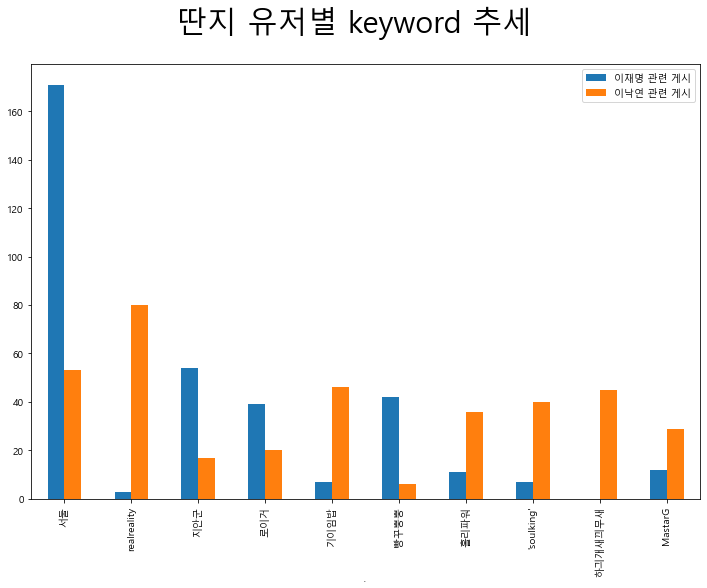



=====   도메인 : 클리앙 분석 내용입니다.   =====


상위 1 위의 작성 관련 키워드입니다.
작성자명 : 대머리찰스
유저 대머리찰스의 이낙연 관련 키워드 활동 수는 28 입니다.
유저 대머리찰스의 이재명 관련 키워드 활동 수는 35 입니다.
해당 유저는 한쪽 키워드에 대한 편향이 적은 유저입니다.


상위 2 위의 작성 관련 키워드입니다.
작성자명 : kagajotaro
유저 kagajotaro의 이낙연 관련 키워드 활동 수는 50 입니다.
유저 kagajotaro의 이재명 관련 키워드 활동 수는 4 입니다.
해당 유저는 이낙연 키워드 관련 유저입니다.


상위 3 위의 작성 관련 키워드입니다.
작성자명 : Castle
유저 Castle의 이낙연 관련 키워드 활동 수는 34 입니다.
유저 Castle의 이재명 관련 키워드 활동 수는 5 입니다.
해당 유저는 이낙연 키워드 관련 유저입니다.


상위 4 위의 작성 관련 키워드입니다.
작성자명 : Goodwillfind
유저 Goodwillfind의 이낙연 관련 키워드 활동 수는 34 입니다.
유저 Goodwillfind의 이재명 관련 키워드 활동 수는 0 입니다.
해당 유저는 이낙연 키워드 관련 유저입니다.


상위 5 위의 작성 관련 키워드입니다.
작성자명 : sian
유저 sian의 이낙연 관련 키워드 활동 수는 29 입니다.
유저 sian의 이재명 관련 키워드 활동 수는 3 입니다.
해당 유저는 이낙연 키워드 관련 유저입니다.


상위 6 위의 작성 관련 키워드입니다.
작성자명 : love114
유저 love114의 이낙연 관련 키워드 활동 수는 17 입니다.
유저 love114의 이재명 관련 키워드 활동 수는 15 입니다.
해당 유저는 한쪽 키워드에 대한 편향이 적은 유저입니다.


상위 7 위의 작성 관련 키워드입니다.
작성자명 : blowtorch
유저 blowtorch의 이낙연 관련 키워드 활동 수는 19 입니다.
유저 blowtorch의 이재명 관련 키워드 활동 수는 8 입니다.


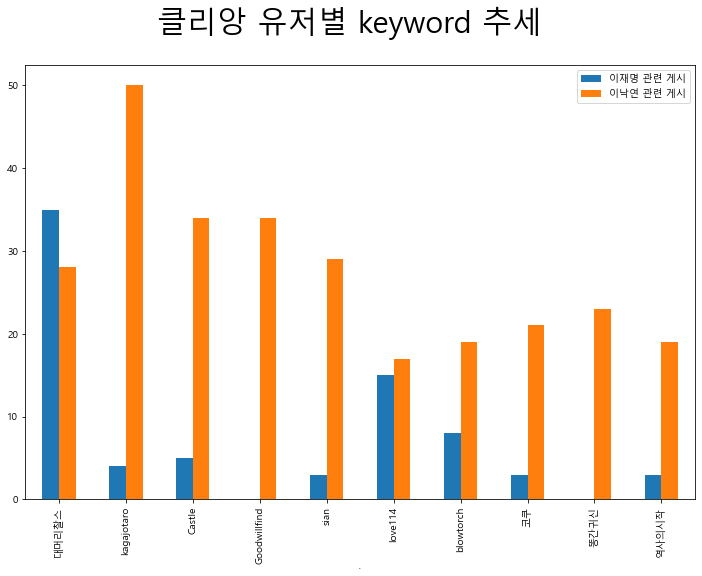



=====   도메인 : 보배드림 분석 내용입니다.   =====


상위 1 위의 작성 관련 키워드입니다.
작성자명 : 보배다
유저 보배다의 이낙연 관련 키워드 활동 수는 4 입니다.
유저 보배다의 이재명 관련 키워드 활동 수는 10 입니다.
해당 유저는 이재명 키워드 관련 유저입니다.


상위 2 위의 작성 관련 키워드입니다.
작성자명 : 이웃과함께
유저 이웃과함께의 이낙연 관련 키워드 활동 수는 4 입니다.
유저 이웃과함께의 이재명 관련 키워드 활동 수는 9 입니다.
해당 유저는 한쪽 키워드에 대한 편향이 적은 유저입니다.


상위 3 위의 작성 관련 키워드입니다.
작성자명 : 치킨데이
유저 치킨데이의 이낙연 관련 키워드 활동 수는 6 입니다.
유저 치킨데이의 이재명 관련 키워드 활동 수는 5 입니다.
해당 유저는 한쪽 키워드에 대한 편향이 적은 유저입니다.


상위 4 위의 작성 관련 키워드입니다.
작성자명 : 뉘링부르2
유저 뉘링부르2의 이낙연 관련 키워드 활동 수는 6 입니다.
유저 뉘링부르2의 이재명 관련 키워드 활동 수는 4 입니다.
해당 유저는 한쪽 키워드에 대한 편향이 적은 유저입니다.


상위 5 위의 작성 관련 키워드입니다.
작성자명 : 복수는처절하게
유저 복수는처절하게의 이낙연 관련 키워드 활동 수는 6 입니다.
유저 복수는처절하게의 이재명 관련 키워드 활동 수는 4 입니다.
해당 유저는 한쪽 키워드에 대한 편향이 적은 유저입니다.


상위 6 위의 작성 관련 키워드입니다.
작성자명 : 달려누냐
유저 달려누냐의 이낙연 관련 키워드 활동 수는 6 입니다.
유저 달려누냐의 이재명 관련 키워드 활동 수는 3 입니다.
해당 유저는 한쪽 키워드에 대한 편향이 적은 유저입니다.


상위 7 위의 작성 관련 키워드입니다.
작성자명 : Natureman
유저 Natureman의 이낙연 관련 키워드 활동 수는 8 입니다.
유저 Natureman의 이재명 관련 키워드 활동 수는 0 입니다.
해당 유저는 이낙연 키워드 관련 유저입니다.


상위 8 위의

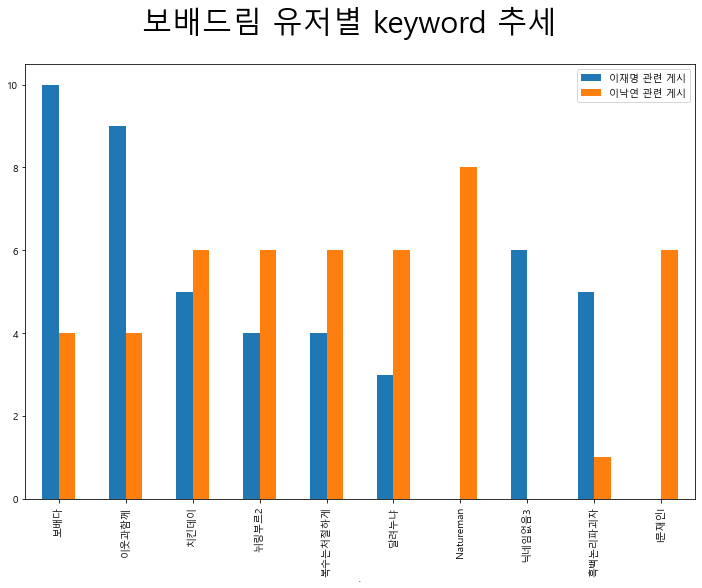

In [38]:
# 성향 분석

for i in range(len(df_list)) :
    print("\n")
    domain = df_list[i]['domain'][0]
    print(f"=====   도메인 : {domain} 분석 내용입니다.   =====")
    
    df_tend = pd.DataFrame()
    name_tend = []
    이낙연_tend = []
    이재명_tend = []    
    
    for j in range(len(df_new)) :
        rank = j + 1
        name = df_new.iloc[j,2*i]
        
        print("\n")
        print(f"상위 {rank} 위의 작성 관련 키워드입니다.")
        print(f"작성자명 : {name}")  

        keyword_list = []
        
        for k in range(len(df_list[i])) :
            if df_list[i]['writer'][k] == name :
                keyword_list.append(df_list[i]['keyword'][k])
        
        keyword_list.sort()
        
        이재명 = []
        이낙연 = []
        
        for k in keyword_list :
            if k == "이낙연" :
                이낙연.append(k)
            else :
                이재명.append(k)
                
        name_tend.append(name)
        이낙연_tend.append(len(이낙연))
        이재명_tend.append(len(이재명))
                
        print(f"유저 {name}의 이낙연 관련 키워드 활동 수는 {len(이낙연)} 입니다.")
        print(f"유저 {name}의 이재명 관련 키워드 활동 수는 {len(이재명)} 입니다.")    
        
        if len(이낙연)/(len(이낙연)+len(이재명)) >= .7 :
            print("해당 유저는 이낙연 키워드 관련 유저입니다.")
        elif len(이재명)/(len(이낙연)+len(이재명)) >= .7 :
            print("해당 유저는 이재명 키워드 관련 유저입니다.")
        else :
            print("해당 유저는 한쪽 키워드에 대한 편향이 적은 유저입니다.")
            
    df_tend['name'] = pd.Series(name_tend)
    df_tend['이재명 관련 게시'] = pd.Series(이재명_tend)
    df_tend['이낙연 관련 게시'] = pd.Series(이낙연_tend)
    
    df_tend.set_index('name').plot(kind='bar', figsize=(12,8))
    plt.xlabel('name', fontsize=0)
    plt.suptitle(f'{domain} 유저별 keyword 추세', fontsize=30)
    plt.show()
#         print(keyword_list)        
        
        

In [1]:
import numpy as np
import pandas as pd
import json
from tqdm import *

import numpy as np
import pandas as pd
import re, nltk, spacy, gensim

# Sklearn
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from pprint import pprint

# Plotting tools
import pyLDAvis
import pyLDAvis.sklearn
import matplotlib.pyplot as plt

c:\python38\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [ ]:
# 성향 분석 - LDA

target_df = df1
target_name = "서둘"


df = target_df
df = df[df['writer']==target_name]
df = df.reset_index(drop=True, inplace=True)

# Convert to list
data = df.user_text.values.tolist()

# user text에서 명사만 추출 

from konlpy.tag import *
from nltk import Text

okt = Okt()

data_morph = []
for i in range(len(data)):
    data_morph.append(" ".join(okt.nouns(data[i])))

vectorizer = CountVectorizer(analyzer='word',       
                         min_df=3,   # 특정 횟수 이상 언급된 것만 따로                      
                         max_features=50000,             
                        )

data_vectorized = vectorizer.fit_transform(data_morph)


NUM_TOPICS = 3 # 분류하는 카테고리 숫자
lda_model = LatentDirichletAllocation(
                        n_components=NUM_TOPICS,              
                        max_iter=10,               
                        learning_method='online',   
                        random_state=100,          
                        batch_size=128,            
                        evaluate_every = -1,       
                        #n_jobs = -1,               
                    )
lda_output = lda_model.fit_transform(data_vectorized)
log = lda_model.score(data_vectorized)
per = lda_model.perplexity(data_vectorized)

# Create Document - Topic Matrix
lda_output = lda_model.transform(data_vectorized)

# column names
topicnames = ["Topic" + str(i) for i in range(lda_model.n_components)]

# index names
docnames = ["Doc" + str(i) for i in range(len(data))]

# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topicnames, index=docnames)

# Get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic

# Styling
def color_green(val):
    color = 'green' if val > .1 else 'black'
    return 'color: {col}'.format(col=color)

def make_bold(val):
    weight = 700 if val > .1 else 400
    return 'font-weight: {weight}'.format(weight=weight)

# Apply Style
df_document_topics = df_document_topic.head(15).style.applymap(color_green).applymap(make_bold)

# Create Document - Topic Matrix
lda_output = lda_model.transform(data_vectorized)

# column names
topicnames = ["Topic" + str(i) for i in range(lda_model.n_components)]

# index names
docnames = ["Doc" + str(i) for i in range(len(data))]

# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topicnames, index=docnames)

# Get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic

# Styling
def color_green(val):
    color = 'green' if val > .1 else 'black'
    return 'color: {col}'.format(col=color)

def make_bold(val):
    weight = 700 if val > .1 else 400
    return 'font-weight: {weight}'.format(weight=weight)

# Apply Style
df_document_topics = df_document_topic.head(15).style.applymap(color_green).applymap(make_bold)
print(df_document_topics)

name_02 = name + "_reference" + ".html"

pyLDAvis.enable_notebook()
p = pyLDAvis.sklearn.prepare(lda_model, data_vectorized, vectorizer)

pyLDAvis.save_html(p,name_02)

    # Show top n keywords for each topic
def show_topics(vectorizer=vectorizer, lda_model=lda_model, n_words=20):
    keywords = np.array(vectorizer.get_feature_names())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords

topic_keywords = show_topics(vectorizer=vectorizer, lda_model=lda_model, n_words=11) 

name_03 = name + "_reference" +".csv"
pd.DataFrame(topic_keywords).to_csv(name_03, index=False, encoding='utf-8-sig')
print(pd.DataFrame(topic_keywords));

pyLDAvis.enable_notebook()
pyLDAvis.sklearn.prepare(lda_model, data_vectorized, vectorizer)